In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

# import data
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date')

In [ ]:
type(df)

In [2]:
df.dtypes

value    int64
dtype: object

In [2]:
# attemping to clean data in a single line
# USE THIS
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [2]:
# clean the data
df = df[df['value'] > df['value'].quantile(0.025)]
df = df[df['value'] < df['value'].quantile(.975)]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<AxesSubplot:title={'center':'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

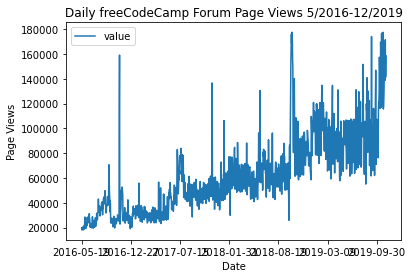

In [3]:
# draw line plot
df.plot(y='value', title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel='Date', ylabel='Page Views')

In [3]:
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df_bar = df.reset_index()
df_bar['date'] = pd.to_datetime(df_bar['date'], format='%Y-%m')
df_bar = df_bar.groupby(pd.Grouper(key='date', freq='M')).sum()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
#df_bar['month'] = df_bar['month'].apply(lambda x: months[x])
df_bar = pd.pivot_table(df_bar, values='value', index=['year', 'month'])
# df_bar = df_bar.pivot(values='value', index=['year', 'month'], columns='value')
df_bar

value
year month         
2016 5        97162
     6       415627
     7       675071
     8       962525
     9      1244306
     10      849348
     11     1213459
     12      862805
2017 1      1016340
     2       871166
     3       910442
     4       926362
     5      1061573
     6      1307325
     7      2040012
     8      1479086
     9      1421304
     10     1470600
     11     1731047
     12     1501038
2018 1      1815983
     2      1839012
     3      1943507
     4      1870525
     5      1753449
     6      2103510
     7      1971323
     8      1947780
     9      1978252
     10     3296235
     11     2360650
     12     2481472
2019 1      3163752
     2      2967114
     3      2827649
     4      2681053
     5      2834637
     6      2532198
     7      2917097
     8      2978802
     9      2918065
     10     2701650
     11     2004330
     12      301467

In [6]:
df_bar.max()

value    3296235
dtype: int64

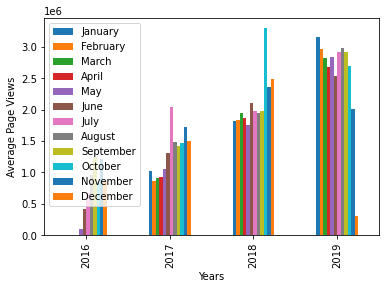

In [4]:
# still trying to figure this out, also trying to figure out if the above is correct for trying to accomplish what i need
# df_bar.plot(kind='bar', y='value', x='year')
df_bar.unstack().plot(kind='bar', xlabel='Years', ylabel='Average Page Views')  # this may require additional work for the yticks
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


<AxesSubplot:xlabel='Years', ylabel='Average Page Views'>

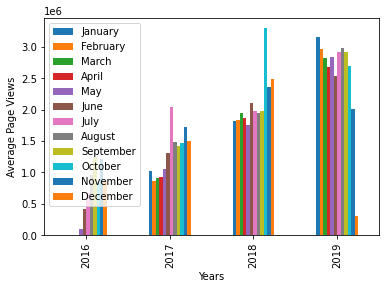

In [8]:
fig = df_bar.unstack().plot(kind='bar', xlabel='Years', ylabel='Average Page Views')  # this may require additional work for the yticks
fig.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fig

In [3]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['date'] = pd.to_datetime(df_box['date'], format='%Y-%m') # adding this line b/c their's doesn't work
df_box['year'] = [d.year for d in df_box.date]
# df_box['year'] = pd.to_datetime(df_box['year'], format='%Y')    # not sure if this is what's needed
df_box['month'] = [d.strftime('%b') for d in df_box.date]
# df_box['month'] = pd.to_datetime(df_box['month'], format='%b')
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [6]:
df_box['year'].dtype

dtype('int64')

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Year-wise Box Plot (Trend)')]

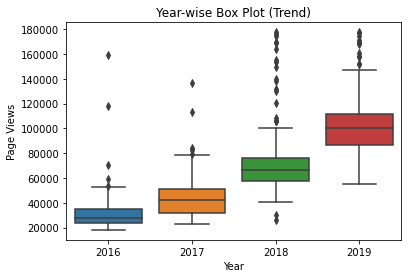

In [13]:
# draw box plot using seaborn
# show how values are distributed within in a given year/month, how it compares over time
# first titled 'Year-wise Box Plot (Trend)', second chart is 'Month-wise Box Plot (seasonality)
# month labels start at Jan
sns.boxplot(x='year', y='value', data=df_box).set(xlabel='Year', ylabel='Page Views', title='Year-wise Box Plot (Trend)')

In [4]:
# other plot
# still need to figure out how to get it on the same figure.
sns.boxplot(data=df_box, x='month', y='value').set(xlabel='Month', ylabel='Page Views', title='Month-wise Box Plot (Seasonality)', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

AttributeError: 'AxesSubplot' object has no property 'order'

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

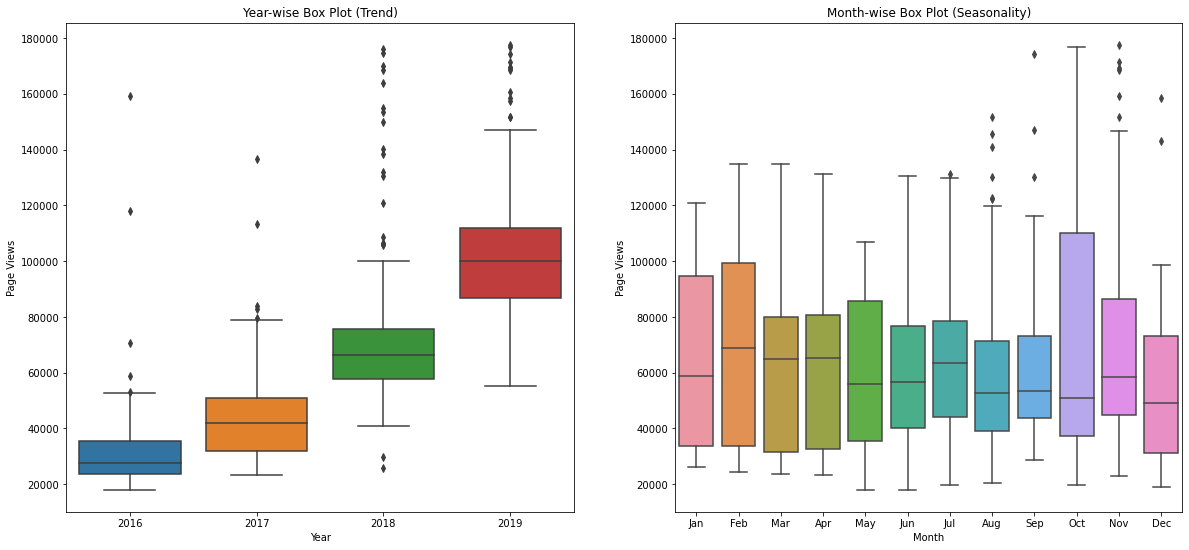

In [6]:
# trying to use facetgrid
fig, axes = plt.subplots(1, 2, figsize=(20,9))

# month_order = df_box.groupby(pd.Grouper(key='date', freq='M'))

sns.boxplot(ax=axes[0], x='year', y='value', data=df_box).set(xlabel='Year', ylabel='Page Views', title='Year-wise Box Plot (Trend)')
sns.boxplot(ax=axes[1], data=df_box, x='month', y='value', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']).set(xlabel='Month', ylabel='Page Views', title='Month-wise Box Plot (Seasonality)')

# 